# Лабораторная работа №1 - Градиентный спуск и его модификации

## 1.1 Выбрать тестовые функции оптимизации (2 шт)

В качестве тестовых функций были выбраны: Функция Бута, Функция МакКормика

## 1.2 Запрограммировать собственную реализацию классического градиентного спуска
Реализуем собственную реализацию классического градиентного спуска.

In [ ]:
def gradient_descent(gradient_func, initial_point, learning_rate, max_iterations):
    x = np.array(initial_point, dtype=float) # Преобразуем начальную точку в NumPy array
    iterations = 0
    while iterations < max_iterations:
        gradient = gradient_func(x[0], x[1])
        x = x - learning_rate * gradient # Обновляем точку
        iterations += 1
    return x

## 1.3 Запрограммировать пайлайн тестирования алгоритма оптимизации
### 1.3.1 Визуализации функции и точки оптимума
Для визуализации подключим библиотеки matplotlib и numpy и создадим функцию для отображения графиков
### 1.3.2 Вычисление погрешности найденного решения в сравнение с аналитическим для нескольких запусков
Создадим функцию погрешности найденного решения в сравнение с аналитическим для нескольких запусков
### 1.3.3 Визуализации точки найденного решения


In [ ]:

import numpy as np
import matplotlib.pyplot as plt

def visualize(function, true_optimum, found_optimum, name):
    x =  np.linspace(-5, 5, 100)
    y = np.linspace(-5, 5, 100)
    X, Y = np.meshgrid(x, y)
    Z = function(X, Y)

    true_z = function(*true_optimum)
    print('Настоящий', true_optimum)

    fig = plt.figure(figsize=(10, 7))
    ax = fig.add_subplot(111, projection='3d')
    fig.colorbar(ax.plot_surface(X, Y, Z, cmap='jet', edgecolor='none', alpha=0.7))
    ax.scatter(*true_optimum, true_z, color='red', s=10, label="Оптимум")

    for i, opt in enumerate(found_optimum):
        z = function(*opt)
        ax.scatter(opt[0], opt[1], z, color='blue', s=10, label=f"Найденный оптимум {i+1}")
        print('Найденный', opt)

    ax.set_title(name)
    ax.set_xlabel('X')
    ax.set_ylabel("Y")
    ax.set_zlabel("f(X, Y)")
    ax.legend()

    plt.show()

def calculate_points_and_error(optimization_function, gradient, true_optimum, start_points, learning_rate=0.001, iterations=1000):
    true_optimum = np.array(true_optimum)
    found_points = []
    errors = []

    for start in start_points:
        found_optimum = optimization_function(gradient, start, learning_rate, iterations)
        found_points.append(found_optimum)
        error = np.linalg.norm(found_optimum - true_optimum)
        errors.append(error)

    average_error = np.mean(errors)
    return found_points, average_error

## 1.4 Запрограммировать метод вычисления градиента

### Тестовая функция Бута

Настоящий [1, 3]


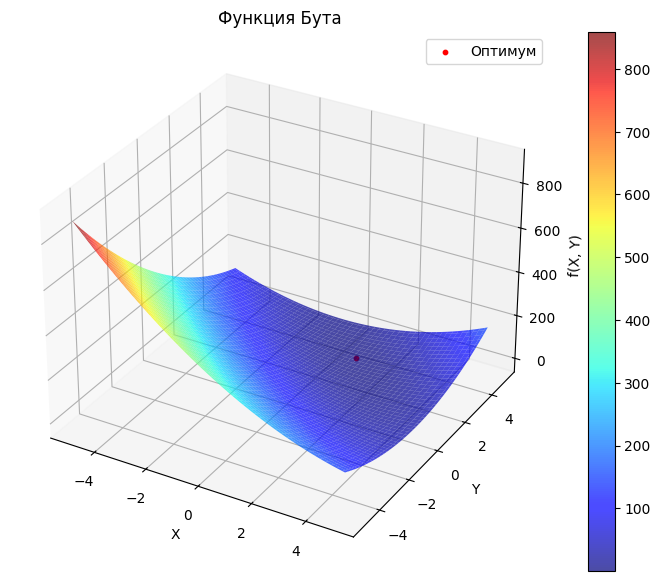

In [ ]:
def booth_function(x, y):
    return (x + 2*y - 7)**2 + (2*x + y - 5)**2

def booth_gradient(x, y):
    gr_x = 2 * (x + 2*y - 7) + 4 * (2*x + y - 5)
    gr_y = 4 * (x + 2*y - 7) + 2 * (2*x + y - 5)
    return np.array([gr_x, gr_y])

booth_true_optimum = [1, 3]
booth_start_points = [[1.,1.], [1.,2.], [1.,-2.]]

visualize(booth_function, booth_true_optimum, [], 'Функция Бута')

### Тестовая функция МакКормика

Настоящий [-0.54719, -1.54719]


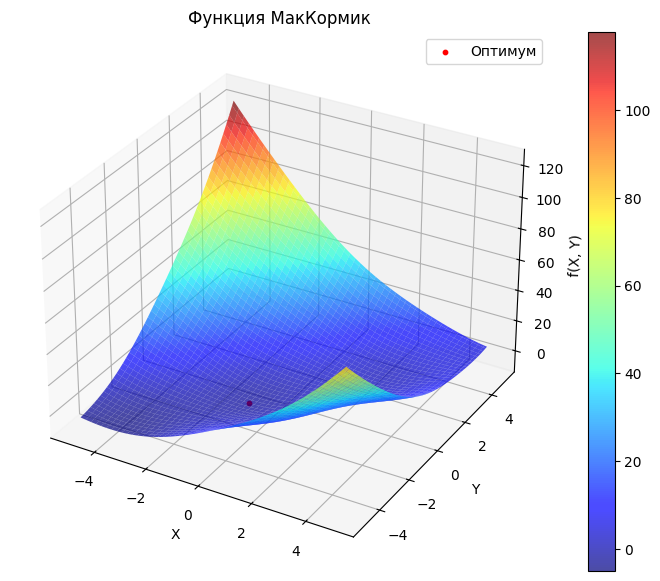

In [ ]:
def mccormic_function(x, y):
    return np.sin(x + y) + (x - y)**2 - 1.5 * x + 2.5 * y + 1

def mccormic_gradient(x, y):
    dx = np.cos(x + y) + 2 * x - 2 * y - 1.5
    dy = np.cos(x + y) - 2 * x + 2 * y + 2.5
    return np.array([dx, dy])

mccormic_true_optimum = [-0.54719, -1.54719]

mccormic_start_points =  [[1.,1.], [1.,2.], [1.,-2.]]

visualize(mccormic_function, mccormic_true_optimum, [], 'Функция МакКормик')

## Вычисление погрешности найденного решения в сравнении с аналитическим для нескольких запусков - Функция Бута

Погрешность: 0.25468010591939505
Настоящий [1, 3]
Найденный [1.13506451 2.86493546]
Найденный [1.06753225 2.93246773]
Найденный [1.33766127 2.66233866]


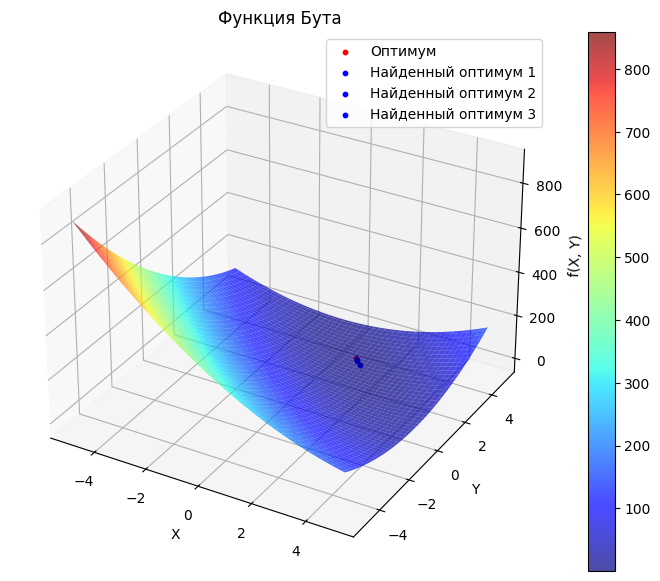

In [ ]:
booth_found_points, booth_average_error = calculate_points_and_error(gradient_descent, booth_gradient, booth_true_optimum, booth_start_points)

print(f"Погрешность: {booth_average_error}")

visualize(booth_function, booth_true_optimum, booth_found_points, 'Функция Бута(Классический градиент)')

## Вычисление погрешности найденного решения в сравнении с аналитическим для нескольких запусков - Функция МакКормика

Погрешность: 2.2866690834921926
Настоящий [-0.54719, -1.54719]
Найденный [1.2419246  0.26009391]
Найденный [2.40191834 1.43825696]
Найденный [-0.44577836 -1.48211698]


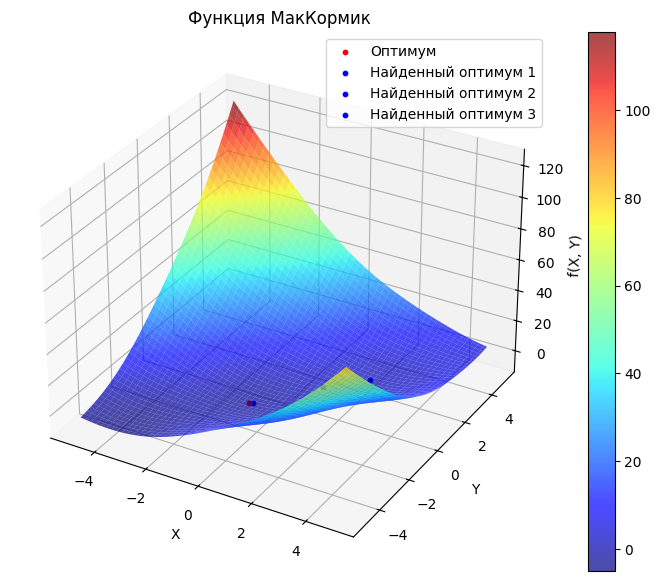

In [ ]:
mccormic_found_points, mccormic_average_error = calculate_points_and_error(gradient_descent, mccormic_gradient, mccormic_true_optimum, mccormic_start_points)

print(f"Погрешность: {mccormic_average_error}")

visualize(mccormic_function,mccormic_true_optimum, mccormic_found_points, 'Функция МакКормик(Классический градиент)')

## 1.5 Запрограммировать одну моментную модификацию и протестировать ее

In [ ]:
def moment_gradient_descent(gradient_func, initial_point, learning_rate, max_iterations, moment=0.9):
    x = np.array(initial_point, dtype=float) # Преобразуем начальную точку в NumPy array
    iterations = 0
    inertion = np.zeros_like(x)
    while iterations < max_iterations:
        gradient = gradient_func(x[0], x[1])
        inertion = moment * inertion - learning_rate * gradient
        x = x + inertion
        iterations += 1
    return x

### Тест на функции Матьяса

Погрешность: 6.224526887544278e-12
Настоящий [1, 3]
Найденный [1. 3.]
Найденный [1. 3.]
Найденный [1. 3.]


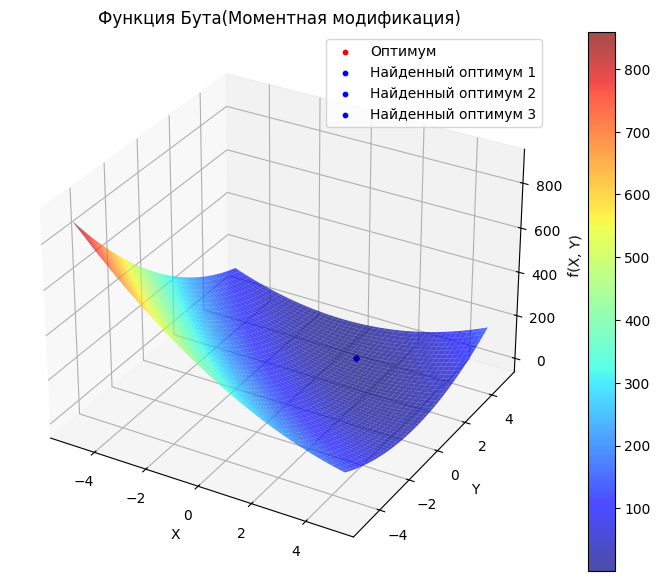

In [ ]:
booth_found_points, booth_average_error = calculate_points_and_error(moment_gradient_descent, booth_gradient, booth_true_optimum, booth_start_points)
print(f"Погрешность: {booth_average_error}")
visualize(booth_function, booth_true_optimum, booth_found_points, 'Функция Бута(Моментная модификация)')

### Тест на функции МакКормика

Погрешность: 1.480964527346731
Настоящий [-0.54719, -1.54719]
Найденный [-0.54719753 -1.54719753]
Найденный [2.5943951 1.5943951]
Найденный [-0.54719755 -1.54719755]


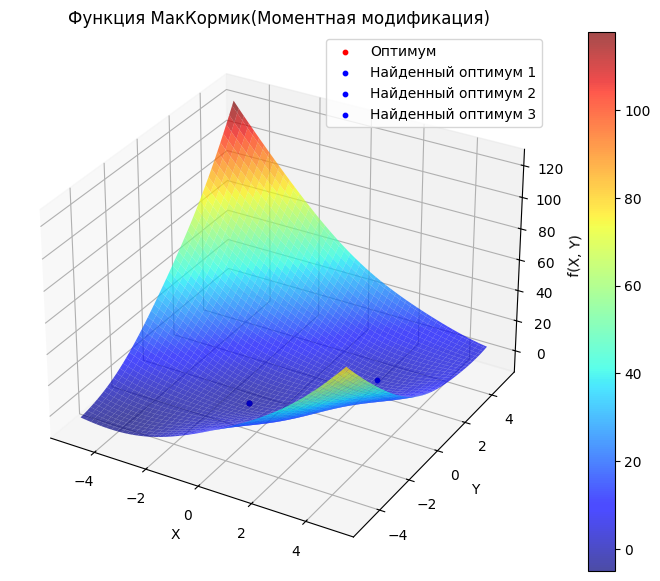

In [ ]:
mccormic_found_points, mccormic_average_error = calculate_points_and_error(moment_gradient_descent, mccormic_gradient, mccormic_true_optimum, mccormic_start_points)

print(f"Погрешность: {mccormic_average_error}")

visualize(mccormic_function,mccormic_true_optimum, mccormic_found_points, 'Функция МакКормик(Моментная модификация)')

## 1.6 Запрограммировать одну адаптивную модификацию и протестировать ее

In [ ]:
def adaptive_gradient_descent(gradient_func, initial_point, learning_rate, max_iterations, beta1=0.9, beta2=0.999, epsilon=1e-8):
    x = np.array(initial_point, dtype=float)  # Преобразуем начальную точку в NumPy array
    m = np.zeros_like(x)  # Первый момент (среднее значение градиента)
    v = np.zeros_like(x)  # Второй момент (среднее значение квадрата градиента)
    t = 0  # Шаг итерации

    for _ in range(max_iterations):
        t += 1
        gradient = gradient_func(x[0], x[1])  # Вычисляем градиент

        m = beta1 * m + (1 - beta1) * gradient  # Обновляем первый момент
        v = beta2 * v + (1 - beta2) * (gradient ** 2)  # Обновляем второй момент

        m_hat = m / (1 - beta1 ** t)  # Коррекция первого момента
        v_hat = v / (1 - beta2 ** t)  # Коррекция второго момента

        x -= learning_rate * m_hat / (np.sqrt(v_hat) + epsilon)  # Обновляем точку

    return x

### Тест на функции Бута

Погрешность: 2.0472112548368826
Настоящий [1, 3]
Найденный [1.69378367 1.78038421]
Найденный [1.37367682 2.58349206]
Найденный [ 1.89256983 -1.08249593]


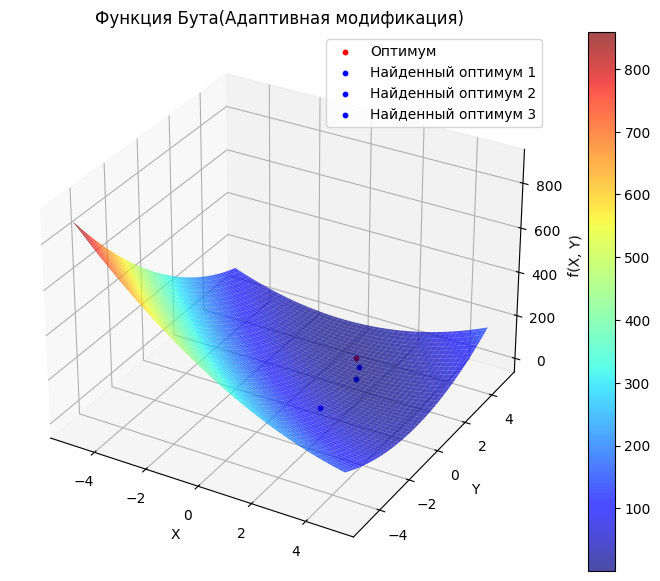

In [ ]:

booth_found_points, booth_average_error = calculate_points_and_error(adaptive_gradient_descent, booth_gradient, booth_true_optimum, booth_start_points)

print(f"Погрешность: {booth_average_error}")

visualize(booth_function, booth_true_optimum, booth_found_points, 'Функция Бута(Адаптивная модификация)')


### Тест на функции МакКормика

Погрешность: 2.407896363950436
Настоящий [-0.54719, -1.54719]
Найденный [1.3992093  0.43337875]
Найденный [1.78639233 1.3156193 ]
Найденный [ 0.18740086 -1.37995108]


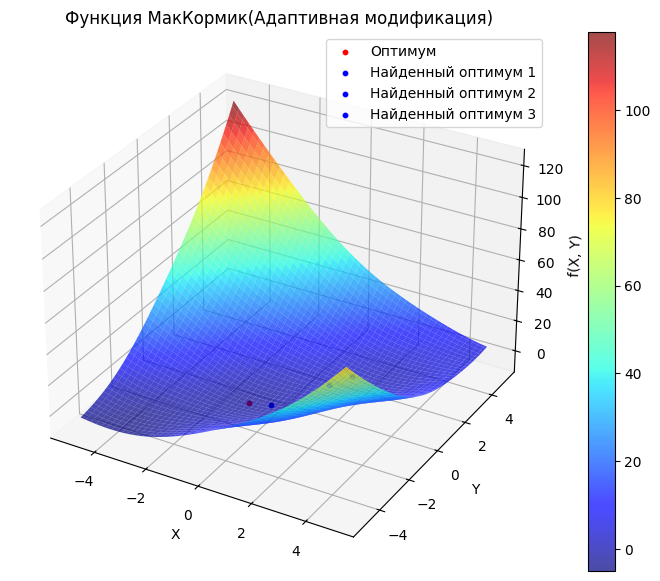

In [ ]:

mccormic_found_points, mccormic_average_error = calculate_points_and_error(adaptive_gradient_descent, mccormic_gradient, mccormic_true_optimum, mccormic_start_points)

print(f"Погрешность: {mccormic_average_error}")

visualize(mccormic_function,mccormic_true_optimum, mccormic_found_points, 'Функция МакКормик(Адаптивная модификация)')

## 1.7 Запрограммировать метод эволюции темпа обучения и протестировать его

In [ ]:
def evo_gradient_descent(gradient_func, initial_point, initial_learning_rate, max_iterations, decay_rate=0.01):
    x = np.array(initial_point, dtype=float)  # Преобразуем начальную точку в NumPy array
    learning_rate = initial_learning_rate

    for iteration in range(max_iterations):
        gradient = gradient_func(x[0], x[1])  # Вычисляем градиент
        x = x - learning_rate * gradient  # Обновляем точку
        # Эволюция темпа обучения
        learning_rate = initial_learning_rate / (1 + decay_rate * iteration)

    return x

### Тест на функции Бута

Погрешность: 1.1641357346214165
Настоящий [1, 3]
Найденный [1.60441117 2.36992549]
Найденный [1.30220559 2.68496275]
Найденный [2.51102793 1.42481373]


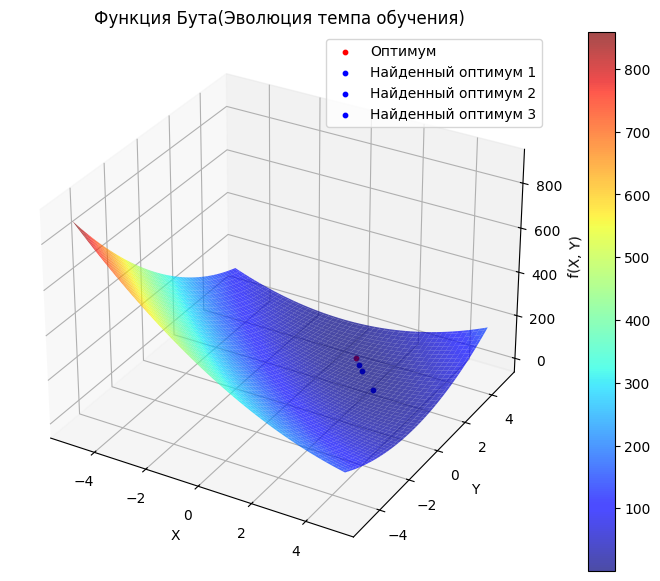

In [ ]:

booth_found_points, booth_average_error = calculate_points_and_error(evo_gradient_descent, booth_gradient, booth_true_optimum, booth_start_points)

print(f"Погрешность: {booth_average_error}")

visualize(booth_function, booth_true_optimum, booth_found_points, 'Функция Бута(Эволюция темпа обучения)')




### Тест на функции МакКормика

Погрешность: 2.4692414232337874
Настоящий [-0.54719, -1.54719]
Найденный [1.28416374 0.66501137]
Найденный [1.73908881 1.50078407]
Найденный [ 0.17756764 -1.58412762]


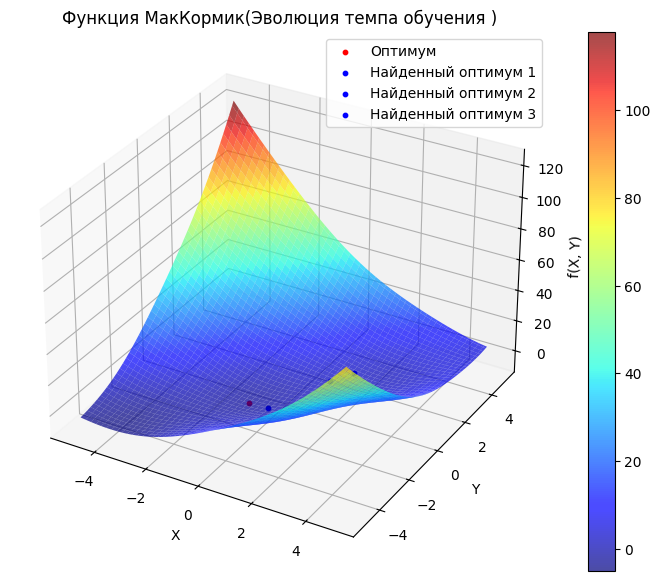

In [ ]:
mccormic_found_points, mccormic_average_error = calculate_points_and_error(evo_gradient_descent, mccormic_gradient, mccormic_true_optimum, mccormic_start_points)

print(f"Погрешность: {mccormic_average_error}")

visualize(mccormic_function,mccormic_true_optimum, mccormic_found_points, 'Функция МакКормик(Эволюция темпа обучения )')